In [13]:
#imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from math import pi


from sklearn.model_selection import cross_validate
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
full_data = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/datos_modelling.csv")

In [3]:
# separar variables y target
y = full_data["pcr_binary"]
X = full_data.drop(columns=["pcr_binary"])

# identificar columnas
gene_cols = [col for col in X.columns if col.endswith("_at")]
clinical_cols = [col for col in X.columns if col not in gene_cols]

# transformers
gene_selector = Pipeline([
    ("var", VarianceThreshold(threshold=0.01)),
    ("kbest", SelectKBest(score_func=f_classif, k=300))
])
clinical_scaler = StandardScaler()

# función de evaluación con validación cruzada
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def evaluar_con_cv(nombre, pipeline):
    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=5,
        scoring={
            "accuracy": make_scorer(accuracy_score),
            "f1": make_scorer(f1_score),
            "roc_auc": make_scorer(roc_auc_score)
        },
        return_train_score=True
    )

    print(f"\n🔍 {nombre} (validación cruzada 5-fold):")
    for metric in ["test_accuracy", "test_f1", "test_roc_auc"]:
        print(f"{metric}: {scores[metric].mean():.3f} ± {scores[metric].std():.3f}")

# modelos con sus pipelines
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

pipe_logreg = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", clinical_scaler, clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

pipe_tree = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# evaluación comparativa
print("evaluación comparativa de modelos (con validación cruzada):")
evaluar_con_cv("Regresión Logística", pipe_logreg)
evaluar_con_cv("Árbol de Decisión", pipe_tree)
evaluar_con_cv("XGBoost", pipe_xgb)

# resumen informativo
print(f"\n🧬 genes originales: {len(gene_cols)}")
print(f"📊 variables clínicas: {len(clinical_cols)}")
print(f"📦 estimación de variables tras pipeline: {300 + len(clinical_cols)}")

# entrenamiento para interpretabilidad posterior
pipe_logreg.fit(X, y)
pipe_tree.fit(X, y)
pipe_xgb.fit(X, y)


evaluación comparativa de modelos (con validación cruzada):

🔍 Regresión Logística (validación cruzada 5-fold):
test_accuracy: 0.594 ± 0.104
test_f1: 0.398 ± 0.081
test_roc_auc: 0.545 ± 0.080

🔍 Árbol de Decisión (validación cruzada 5-fold):
test_accuracy: 0.665 ± 0.052
test_f1: 0.483 ± 0.144
test_roc_auc: 0.628 ± 0.097

🔍 XGBoost (validación cruzada 5-fold):
test_accuracy: 0.592 ± 0.054
test_f1: 0.236 ± 0.153
test_roc_auc: 0.498 ± 0.060

🧬 genes originales: 54675
📊 variables clínicas: 19
📦 estimación de variables tras pipeline: 319


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('clinical', 'passthrough',
                                                  ['size_dissected_area',
                                                   'cell_number_dissected',
                                                   'inflammatory_cells_pct',
                                                   'invasive_tumor_area_size1_mm',
                                                   'invasive_tumor_area_size2_mm',
                                                   'invasive_tumor_grade',
                                                   'necrotic_cells_pct',
                                                   'normal_epithelial_cells_pct',
                                                   'stroma_cells_pct', 'bgusct',
                                                   'erct', 'er', 'pr', 'age',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [4]:
# separar variables y target
y = full_data["pcr_binary"]
X = full_data.drop(columns=["pcr_binary"])

#  identificar columnas
gene_cols = [col for col in X.columns if col.endswith("_at")]
clinical_cols = [col for col in X.columns if col not in gene_cols]

# transformers
gene_selector = Pipeline([
    ("var", VarianceThreshold(threshold=0.01)),
    ("kbest", SelectKBest(score_func=f_classif, k=300))
])
clinical_scaler = StandardScaler()

# función de evaluación con validación cruzada
def evaluar_con_cv(nombre, pipeline):
    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=5,
        scoring={
            "accuracy": make_scorer(accuracy_score),
            "f1": make_scorer(f1_score),
            "roc_auc": make_scorer(roc_auc_score)
        },
        return_train_score=True
    )

    print(f"\n🔍 {nombre} (validación cruzada 5-fold):")
    for metric in ["test_accuracy", "test_f1", "test_roc_auc"]:
        print(f"{metric}: {scores[metric].mean():.3f} ± {scores[metric].std():.3f}")

# modelos con sus pipelines
pipe_logreg = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", clinical_scaler, clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

pipe_tree = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# ejecutar evaluación
print("evaluación comparativa de modelos (con validación cruzada):")
evaluar_con_cv("Regresión Logística", pipe_logreg)
evaluar_con_cv("Árbol de Decisión", pipe_tree)
evaluar_con_cv("XGBoost", pipe_xgb)

# resumen informativo
print(f"\ngenes originales: {len(gene_cols)}")
print(f"variables clínicas: {len(clinical_cols)}")
print(f"estimación de variables tras pipeline: {300 + len(clinical_cols)}")

evaluación comparativa de modelos (con validación cruzada):

🔍 Regresión Logística (validación cruzada 5-fold):
test_accuracy: 0.594 ± 0.104
test_f1: 0.398 ± 0.081
test_roc_auc: 0.545 ± 0.080

🔍 Árbol de Decisión (validación cruzada 5-fold):
test_accuracy: 0.665 ± 0.052
test_f1: 0.483 ± 0.144
test_roc_auc: 0.628 ± 0.097

🔍 XGBoost (validación cruzada 5-fold):
test_accuracy: 0.592 ± 0.054
test_f1: 0.236 ± 0.153
test_roc_auc: 0.498 ± 0.060

genes originales: 54675
variables clínicas: 19
estimación de variables tras pipeline: 319


### Evaluación comparativa de modelos con validación cruzada

Para comparar el rendimiento de los modelos predictivos se utilizó validación cruzada estratificada 5-fold. Todos los modelos incluyen una pipeline que evita el leakage, integrando los pasos de selección de genes dentro de la validación.

#### Resultados:

| Modelo                | Accuracy (±) | F1-score (±) | ROC AUC (±) |
|-----------------------|--------------|--------------|-------------|
| **Regresión Logística** | 0.594 ± 0.104 | 0.398 ± 0.081 | 0.545 ± 0.080 |
| **Árbol de Decisión**   | 0.665 ± 0.052 | 0.483 ± 0.144 | 0.628 ± 0.097 |
| **XGBoost**             | 0.592 ± 0.054 | 0.236 ± 0.153 | 0.498 ± 0.060 |

#### Información adicional:
- **Genes originales**: 54,675
- **Variables clínicas**: 19
- **Variables finales tras la pipeline**: 319 (300 genes seleccionados + 19 clínicas)



> Estos resultados son más conservadores que en evaluaciones anteriores, precisamente porque el proceso de selección de variables se integra correctamente dentro de cada fold de validación, evitando el sobreajuste.


# Hiperparametros

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

# parámetros árbol de decisión
tree_param_grid = {
    "clf__max_depth": randint(3, 15),
    "clf__min_samples_split": randint(2, 10),
    "clf__min_samples_leaf": randint(1, 10),
    "clf__criterion": ["gini", "entropy"]
}

# pipeline árbol con preprocessing
pipe_tree = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

tree_search = RandomizedSearchCV(
    pipe_tree,
    param_distributions=tree_param_grid,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start = time.time()
tree_search.fit(X, y)
print(f"⏱ tiempo árbol de decisión: {time.time() - start:.2f}s")
print("✅ mejor árbol:", tree_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
⏱ tiempo árbol de decisión: 20.00s
✅ mejor árbol: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 3}


In [6]:
# parámetros para XGBoost
xgb_param_grid = {
    "clf__max_depth": randint(3, 10),
    "clf__learning_rate": uniform(0.01, 0.3),
    "clf__n_estimators": randint(50, 300),
    "clf__subsample": uniform(0.5, 0.5),
    "clf__colsample_bytree": uniform(0.5, 0.5),
    "clf__gamma": uniform(0, 1),
    "clf__reg_lambda": uniform(0, 1),
    "clf__reg_alpha": uniform(0, 1),
}

pipe_xgb = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", XGBClassifier(eval_metric="logloss", random_state=42))
])

xgb_search = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=xgb_param_grid,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start = time.time()
xgb_search.fit(X, y)
print(f"⏱ tiempo XGBoost: {time.time() - start:.2f}s")
print("✅ mejor XGBoost:", xgb_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
⏱ tiempo XGBoost: 21.39s
✅ mejor XGBoost: {'clf__colsample_bytree': np.float64(0.8022086896389087), 'clf__gamma': np.float64(0.5398410913016731), 'clf__learning_rate': np.float64(0.07091836742043081), 'clf__max_depth': 7, 'clf__n_estimators': 209, 'clf__reg_alpha': np.float64(0.598865466488536), 'clf__reg_lambda': np.float64(0.6947849330397046), 'clf__subsample': np.float64(0.9402339195076288)}



 Regresión Logística (validación cruzada 5-fold):
test_accuracy: 0.594 ± 0.104
test_f1: 0.398 ± 0.081
test_roc_auc: 0.545 ± 0.080

 Árbol de Decisión (opt) (validación cruzada 5-fold):
test_accuracy: 0.671 ± 0.035
test_f1: 0.536 ± 0.078
test_roc_auc: 0.654 ± 0.054

 XGBoost (opt) (validación cruzada 5-fold):
test_accuracy: 0.671 ± 0.035
test_f1: 0.338 ± 0.072
test_roc_auc: 0.567 ± 0.034


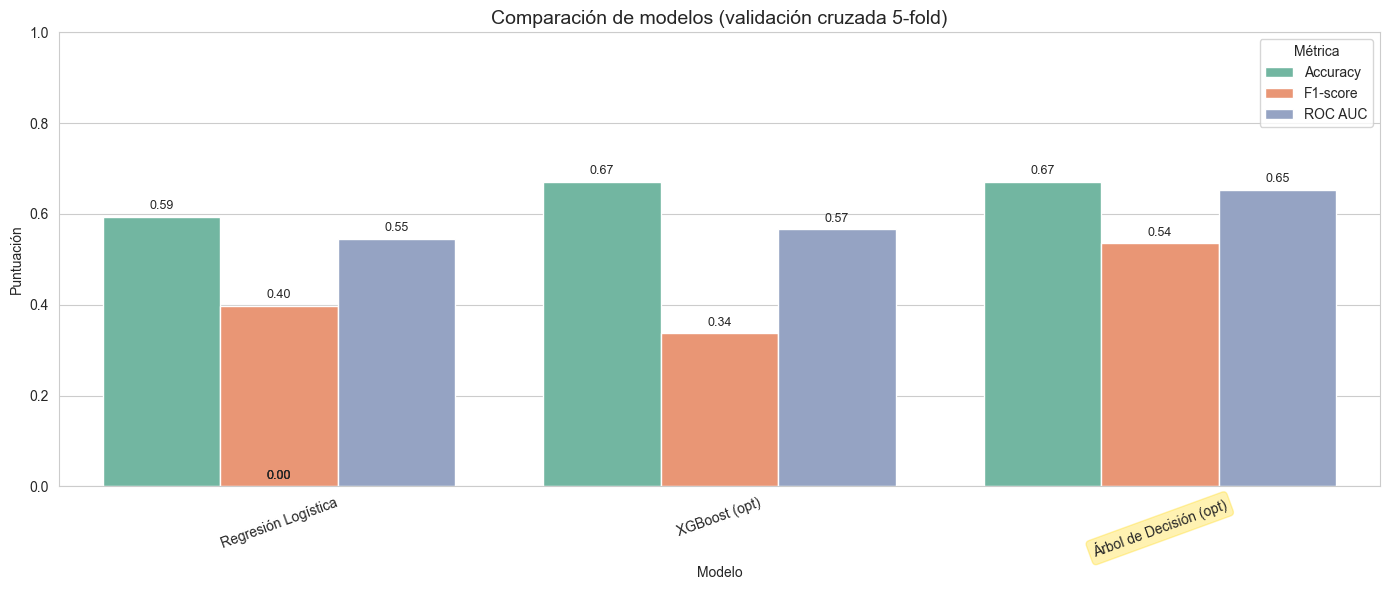

In [9]:
# separar features y target
y = full_data["pcr_binary"]
X = full_data.drop(columns=["pcr_binary"])

# identificar columnas
gene_cols = [col for col in X.columns if col.endswith("_at")]
clinical_cols = [col for col in X.columns if col not in gene_cols]

# gene selector
gene_selector = Pipeline([
    ("var", VarianceThreshold(threshold=0.01)),
    ("kbest", SelectKBest(score_func=f_classif, k=300))
])

# escalador solo para regresión logística
clinical_scaler = StandardScaler()

# limpiar los hiperparámetros de los modelos optimizados
tree_best_params_clean = {
    key.replace("clf__", ""): val for key, val in tree_search.best_params_.items()
}

xgb_best_params_clean = {
    key.replace("clf__", ""): val for key, val in xgb_search.best_params_.items()
}

# definir pipelines
pipe_logreg = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", clinical_scaler, clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

pipe_tree_opt = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", DecisionTreeClassifier(**tree_best_params_clean, class_weight="balanced", random_state=42))
])

pipe_xgb_opt = Pipeline([
    ("preprocessing", ColumnTransformer([
        ("clinical", "passthrough", clinical_cols),
        ("genes", gene_selector, gene_cols)
    ])),
    ("clf", XGBClassifier(**xgb_best_params_clean, eval_metric="logloss", random_state=42))
])

# función de evaluación que guarda resultados
resultados_modelos = []

def evaluar_con_cv(nombre, pipeline):
    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=5,
        scoring={
            "accuracy": make_scorer(accuracy_score),
            "f1": make_scorer(f1_score),
            "roc_auc": make_scorer(roc_auc_score)
        },
        return_train_score=False
    )

    resultados_modelos.append({
        "Modelo": nombre,
        "Accuracy": scores["test_accuracy"].mean(),
        "F1-score": scores["test_f1"].mean(),
        "ROC AUC": scores["test_roc_auc"].mean()
    })

    print(f"\n {nombre} (validación cruzada 5-fold):")
    for metric in ["test_accuracy", "test_f1", "test_roc_auc"]:
        print(f"{metric}: {scores[metric].mean():.3f} ± {scores[metric].std():.3f}")

# evaluar todos los modelos
evaluar_con_cv("Regresión Logística", pipe_logreg)
evaluar_con_cv("Árbol de Decisión (opt)", pipe_tree_opt)
evaluar_con_cv("XGBoost (opt)", pipe_xgb_opt)

# visualización de comparación
df = pd.DataFrame(resultados_modelos)
df["Media"] = df[["Accuracy", "F1-score", "ROC AUC"]].mean(axis=1)
df_sorted = df.sort_values("Media", ascending=True).drop(columns="Media")
df_melted = df_sorted.melt(id_vars="Modelo", var_name="Métrica", value_name="Puntuación")
mejor_modelo = df_sorted.iloc[-1]["Modelo"]


plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Modelo", y="Puntuación", hue="Métrica", palette="Set2")

# etiquetas encima
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width()/2., height + 0.01),
                ha='center', va='bottom', fontsize=9)

# resaltar mejor modelo
for label in ax.get_xticklabels():
    if label.get_text() == mejor_modelo:
        label.set_bbox(dict(facecolor="gold", edgecolor="gold", boxstyle="round,pad=0.3", alpha=0.3))

plt.title("Comparación de modelos (validación cruzada 5-fold)", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.xlabel("Modelo")
plt.ylabel("Puntuación")
plt.legend(title="Métrica")
plt.tight_layout()

# guardamos la figura
output_dir = "/Users/user/Desktop/breast_cancer_fr/plots/evaluacion_modelos"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "comparacion_modelos_ordenado_completo.png"), dpi=300)
plt.show()


# Comparativas

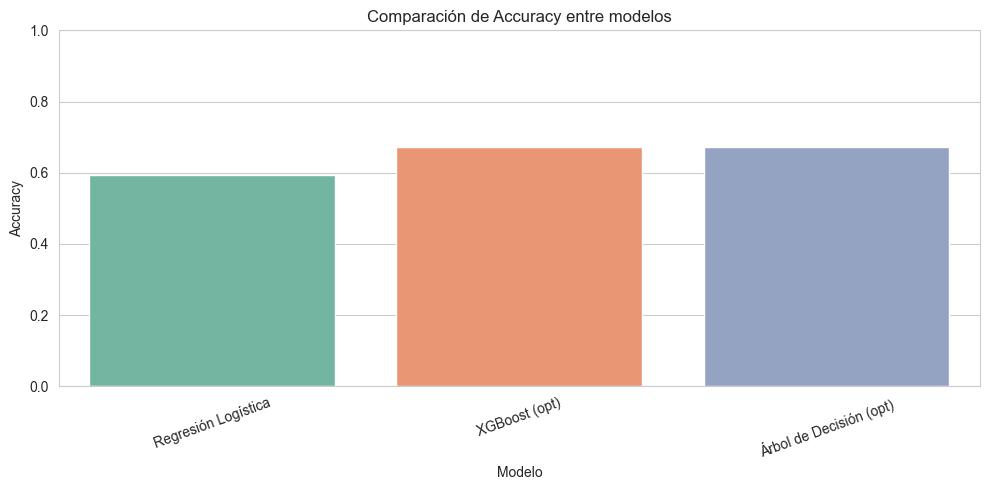

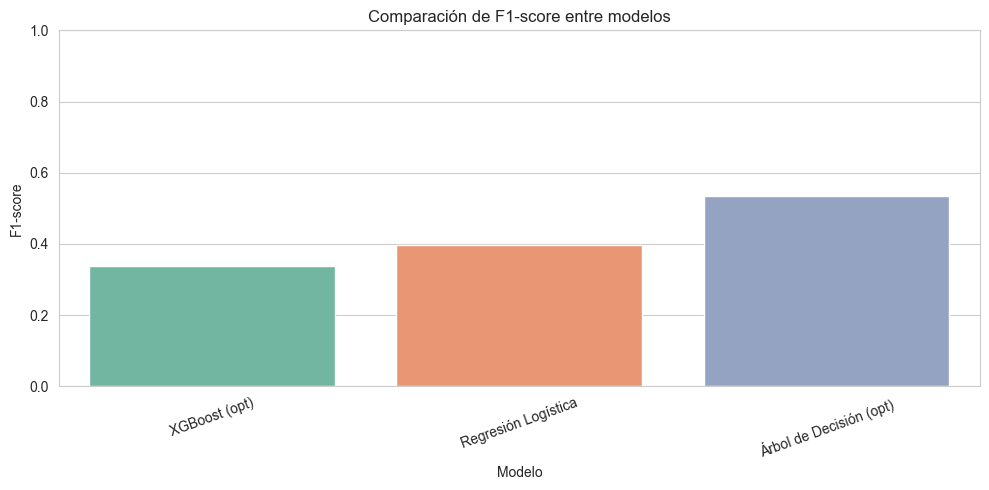

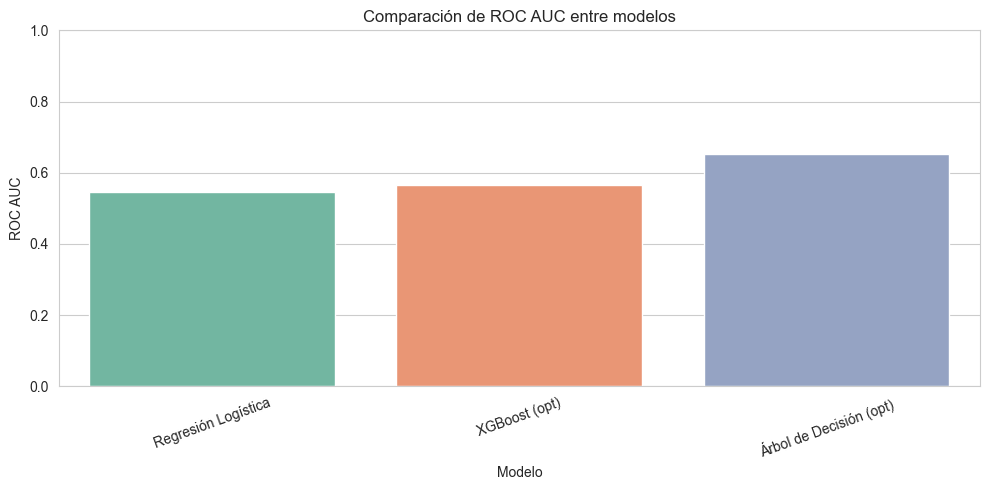

In [10]:
# reconstruir el dataframe y ordenarlo por media de métricas
resultados_modelos_df = pd.DataFrame(resultados_modelos)
resultados_modelos_df["Media"] = resultados_modelos_df[["Accuracy", "F1-score", "ROC AUC"]].mean(axis=1)
resultados_modelos_df = resultados_modelos_df.sort_values(by="Media", ascending=True)

# definir métricas
metricas = ["Accuracy", "F1-score", "ROC AUC"]

# asegurar carpeta de salida
output_dir = "/Users/user/Desktop/breast_cancer_fr/plots/evaluacion_modelos"
os.makedirs(output_dir, exist_ok=True)

# gráfico de barras individuales por métrica
for metrica in metricas:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=resultados_modelos_df.sort_values(by=metrica),
        x="Modelo", y=metrica, hue="Modelo", palette="Set2", legend=False
    )
    plt.title(f"Comparación de {metrica} entre modelos")
    plt.xticks(rotation=20)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"comparacion_{metrica.lower().replace(' ', '_')}.png"), dpi=300)
    plt.show()

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/1579906987.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cv_df, x="Modelo", y=metrica, palette="Set3")


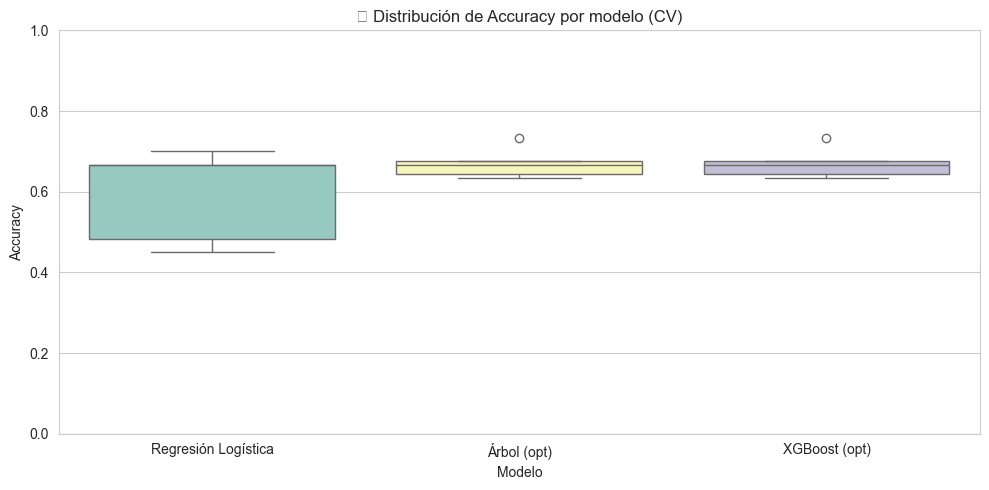

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/1579906987.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cv_df, x="Modelo", y=metrica, palette="Set3")


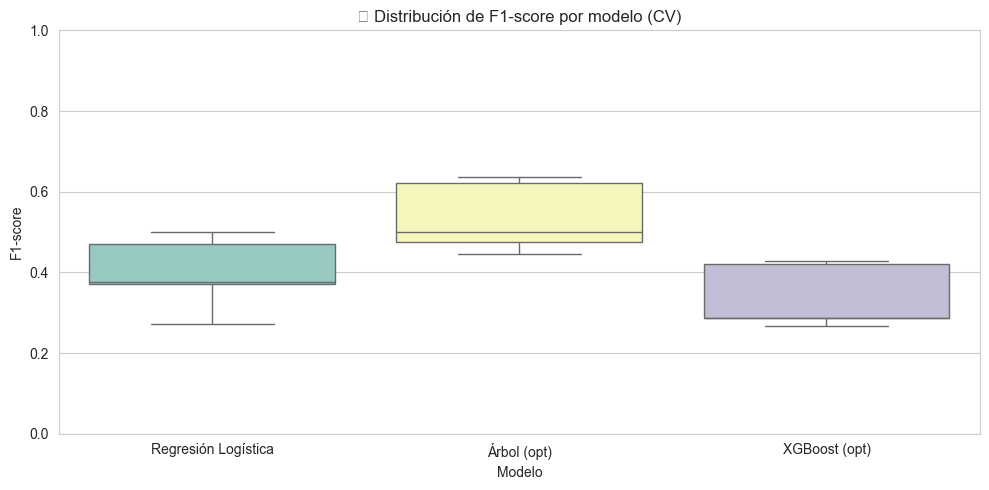

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/1579906987.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cv_df, x="Modelo", y=metrica, palette="Set3")


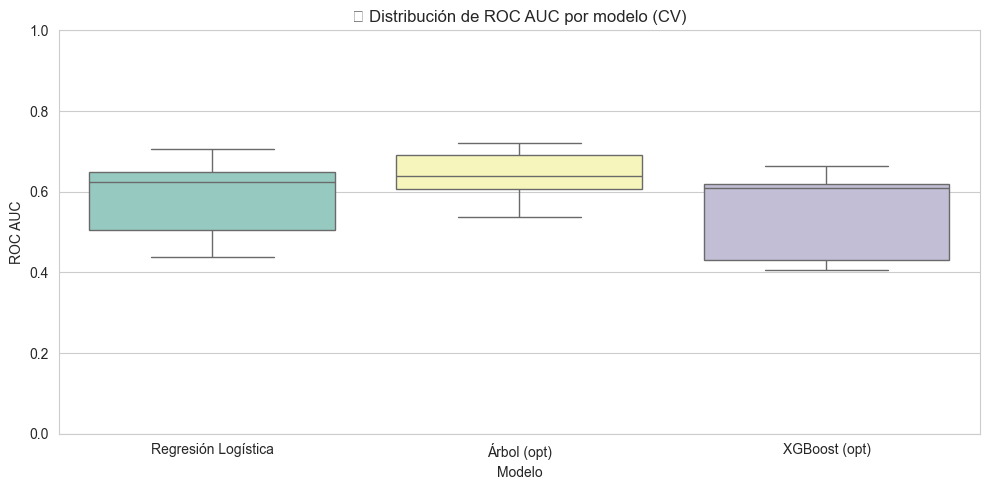

In [12]:
# ejemplo para obtener los valores individuales de cada fold
def obtener_scores_cv(nombre, pipeline):
    scores = cross_validate(
        pipeline, X, y, cv=5,
        scoring={"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"},
        return_train_score=False
    )
    df = pd.DataFrame(scores)
    df["Modelo"] = nombre
    return df[["test_accuracy", "test_f1", "test_roc_auc", "Modelo"]]

# correr para cada modelo
df_logreg = obtener_scores_cv("Regresión Logística", pipe_logreg)
df_tree   = obtener_scores_cv("Árbol (opt)", pipe_tree_opt)
df_xgb    = obtener_scores_cv("XGBoost (opt)", pipe_xgb_opt)

# concatenar
cv_df = pd.concat([df_logreg, df_tree, df_xgb], ignore_index=True)
cv_df.rename(columns={
    "test_accuracy": "Accuracy",
    "test_f1": "F1-score",
    "test_roc_auc": "ROC AUC"
}, inplace=True)

for metrica in ["Accuracy", "F1-score", "ROC AUC"]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=cv_df, x="Modelo", y=metrica, palette="Set3")
    plt.title(f"📦 Distribución de {metrica} por modelo (CV)")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"boxplot_{metrica.lower().replace(' ', '_')}.png"), dpi=300)
    plt.show()


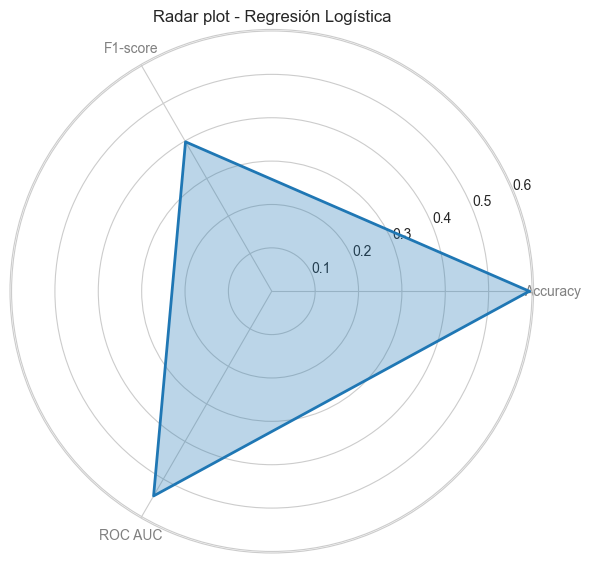

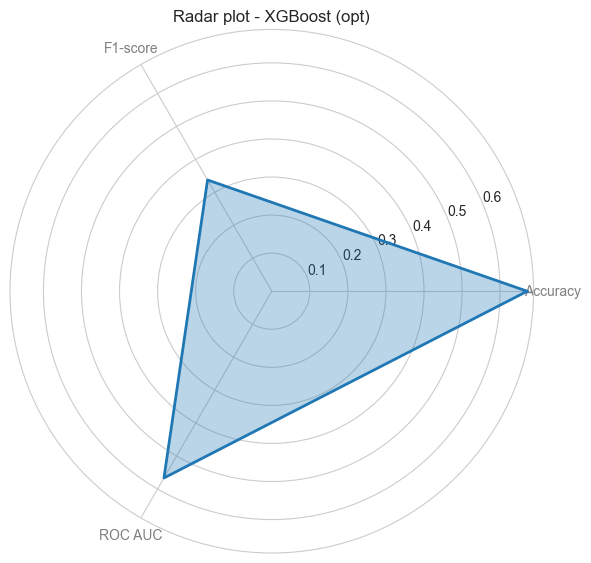

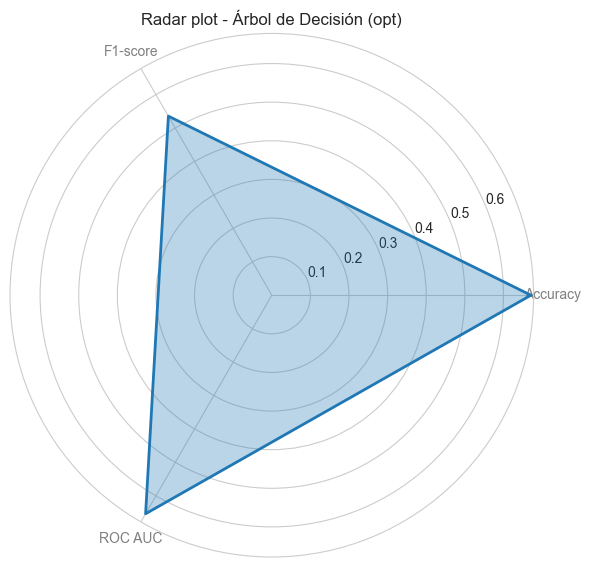

In [14]:
# normalizamos y preparamos datos
df_radar = resultados_modelos_df.set_index("Modelo")[["Accuracy", "F1-score", "ROC AUC"]]
df_radar = df_radar.reset_index()

# radar plot por modelo
for i, row in df_radar.iterrows():
    categorias = list(df_radar.columns[1:])
    valores = row[categorias].tolist()
    valores += valores[:1]  # cerrar el círculo

    angulos = [n / float(len(categorias)) * 2 * pi for n in range(len(categorias))]
    angulos += angulos[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angulos[:-1], categorias, color='grey', size=10)

    ax.plot(angulos, valores, linewidth=2, linestyle='solid', label=row["Modelo"])
    ax.fill(angulos, valores, alpha=0.3)

    plt.title(f"Radar plot - {row['Modelo']}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"radarplot_{row['Modelo'].lower().replace(' ', '_')}.png"), dpi=300)
    plt.show()


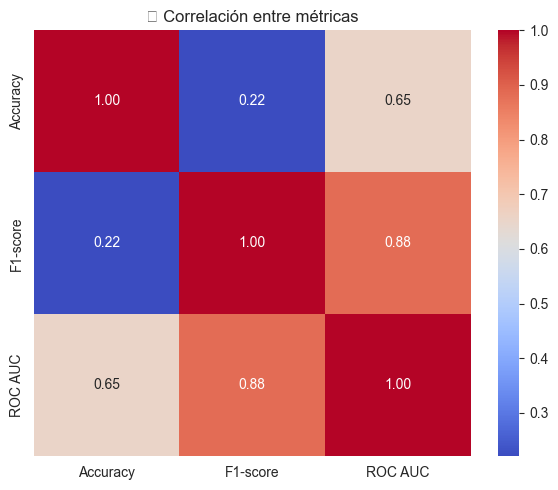

In [15]:
corr_matrix = resultados_modelos_df[["Accuracy", "F1-score", "ROC AUC"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlación entre métricas")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "heatmap_metricas.png"), dpi=300)
plt.show()

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/3533942143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cv_df, x="Modelo", y=metrica, palette="Pastel2")


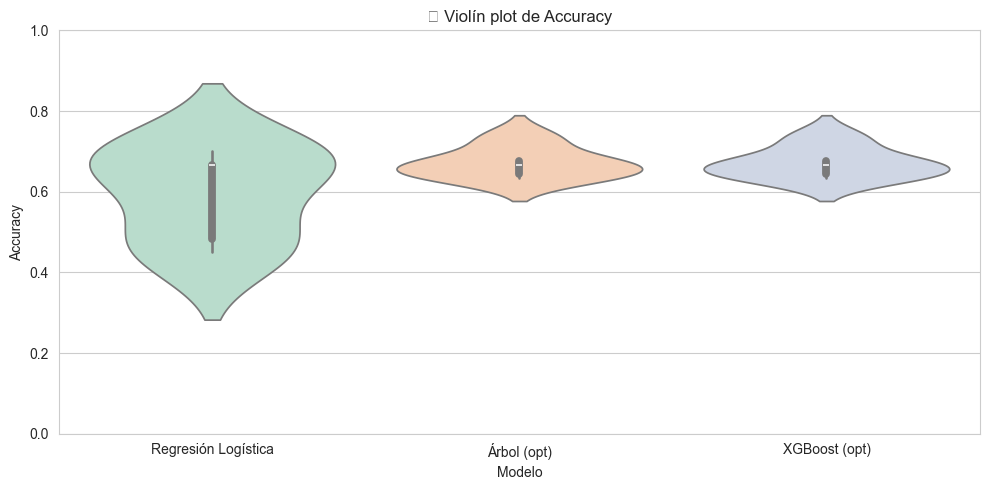

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/3533942143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cv_df, x="Modelo", y=metrica, palette="Pastel2")


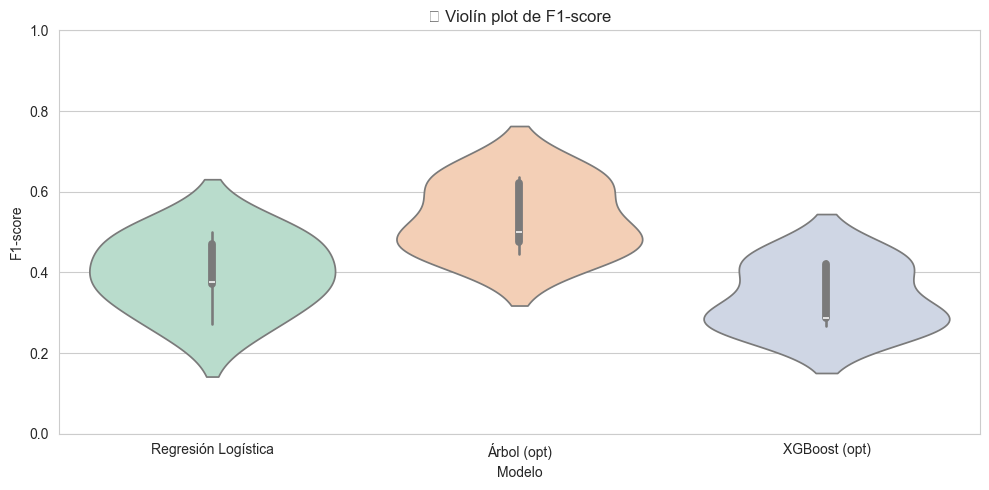

/var/folders/9c/680h3dp94g5fy_w17b_qdkjr0000gn/T/ipykernel_1681/3533942143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cv_df, x="Modelo", y=metrica, palette="Pastel2")


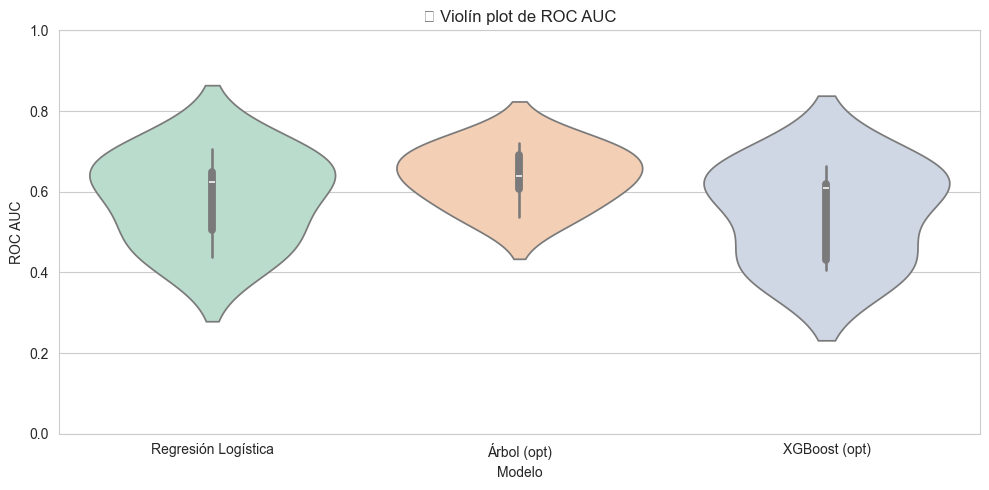

In [16]:
for metrica in ["Accuracy", "F1-score", "ROC AUC"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=cv_df, x="Modelo", y=metrica, palette="Pastel2")
    plt.title(f"🎻 Violín plot de {metrica}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"violin_{metrica.lower().replace(' ', '_')}.png"), dpi=300)
    plt.show()

# SHAP Values

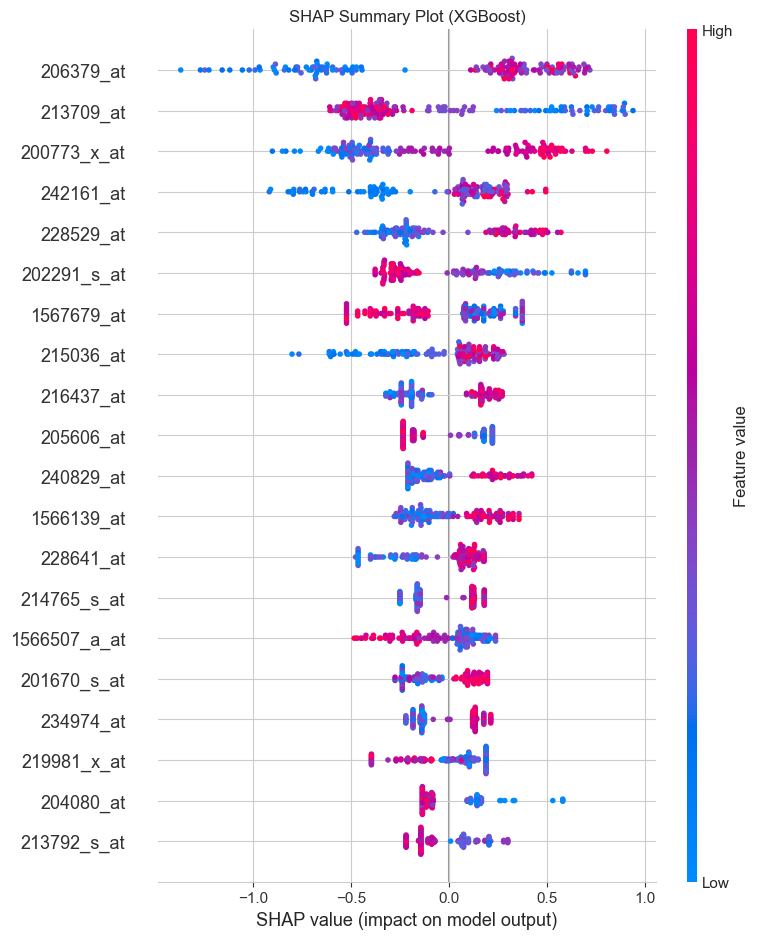

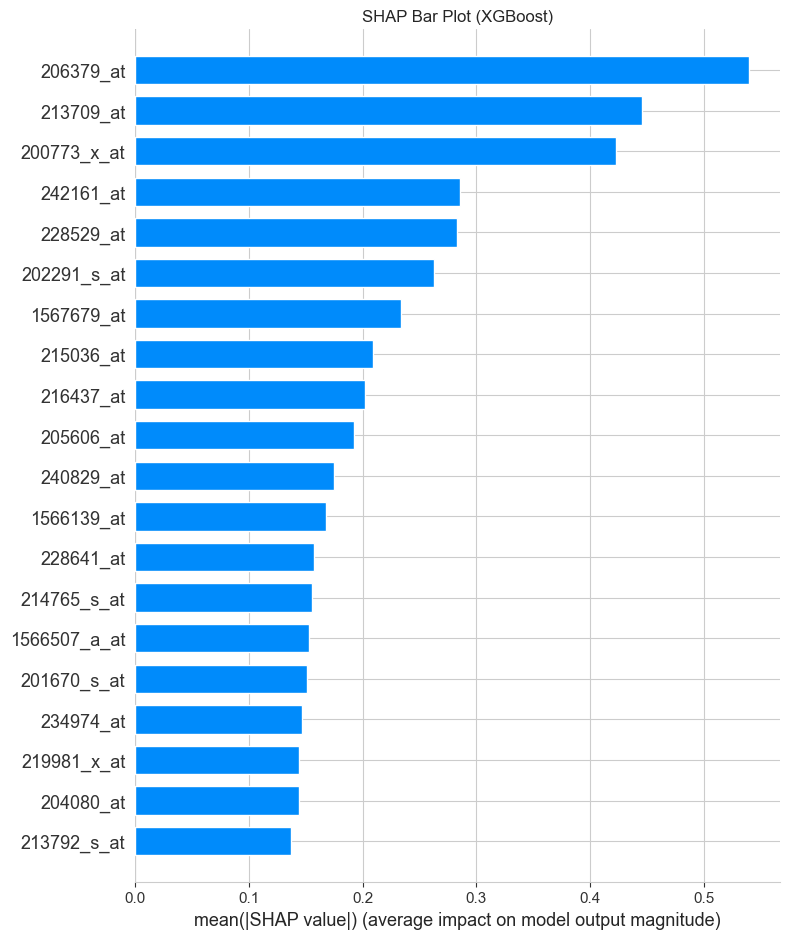

<Figure size 640x480 with 0 Axes>

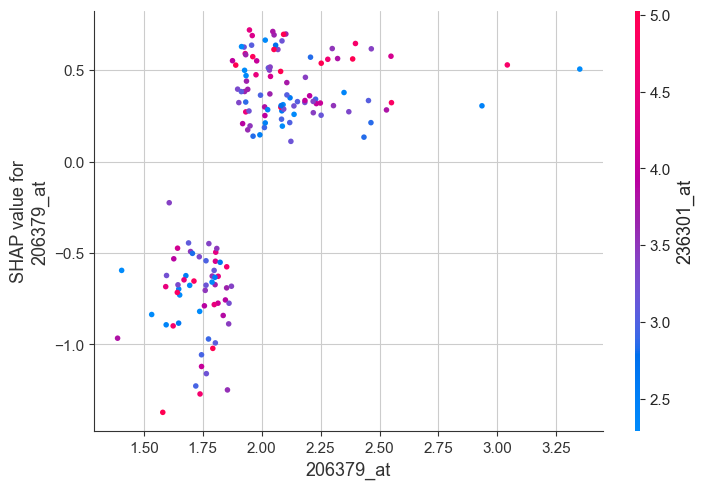

SHAP plots generados y guardados en:
/Users/user/Desktop/breast_cancer_fr/plots/interpretacion/shap


In [18]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

# entrenar el pipeline completo
pipe_xgb.fit(X, y)

# extraer el modelo ya entrenado
modelo_xgb = pipe_xgb.named_steps["clf"]

#obtener los nombres finales de las variables
# aplicar selección de genes paso a paso
gene_selector_fitted = pipe_xgb.named_steps["preprocessing"].named_transformers_["genes"]

# aplicar el primer paso: varianza
var_selector = gene_selector_fitted.named_steps["var"]
kbest_selector = gene_selector_fitted.named_steps["kbest"]

# aplicar sobre los datos originales
X_genes = X[gene_cols]
X_genes_var = var_selector.fit_transform(X_genes)
genes_post_var = X_genes.columns[var_selector.get_support()]

# ahora aplicar SelectKBest
kbest_selector.fit(X_genes_var, y)
genes_finales = genes_post_var[kbest_selector.get_support()]

# nombres finales: clínicas + genes seleccionados
columnas_finales = clinical_cols + list(genes_finales)

# transformar los datos como los ve el modelo
X_transformed = pipe_xgb.named_steps["preprocessing"].transform(X)
X_final = pd.DataFrame(X_transformed, columns=columnas_finales).astype(float)

# crear directorio
shap_dir = "/Users/user/Desktop/breast_cancer_fr/plots/interpretacion/shap"
os.makedirs(shap_dir, exist_ok=True)

# calcular SHAP values
explainer = shap.TreeExplainer(modelo_xgb)
shap_values = explainer.shap_values(X_final)

# summary plot (dot)
plt.figure()
shap.summary_plot(shap_values, X_final, plot_type="dot", show=False)
plt.title("SHAP Summary Plot (XGBoost)")
plt.tight_layout()
plt.savefig(os.path.join(shap_dir, "shap_summary_dot_xgboost.png"), dpi=300)
plt.show()
plt.close()

#  summary plot (bar) 
plt.figure()
shap.summary_plot(shap_values, X_final, plot_type="bar", show=False)
plt.title("SHAP Bar Plot (XGBoost)")
plt.tight_layout()
plt.savefig(os.path.join(shap_dir, "shap_summary_bar_xgboost.png"), dpi=300)
plt.show()
plt.close()

# dependence plot del gen más relevante
feature_importances = np.abs(shap_values).mean(axis=0)
top_feature = X_final.columns[np.argmax(feature_importances)]

plt.figure()
shap.dependence_plot(top_feature, shap_values, X_final, show=False)
plt.tight_layout()
plt.savefig(os.path.join(shap_dir, f"shap_dependence_{top_feature}.png"), dpi=300)
plt.show()
plt.close()

# force plot (una muestra representativa)
shap.initjs()
i = 0 

force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_final.iloc[i],
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.savefig(os.path.join(shap_dir, f"shap_force_plot_sample_{i}.png"), dpi=300)
plt.show
plt.close()

print("SHAP plots generados y guardados en:")
print(shap_dir)


In [ ]:
# cargar el archivo de anotaciones
anotaciones_df = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/genes_anotados.csv")

# obtener la importancia media de cada feature
feature_importances = np.abs(shap_values).mean(axis=0)

# top 20 features más importantes
top_indices = np.argsort(feature_importances)[-20:][::-1]
top_genes = X_final.columns[top_indices]

# crear dataframe con los genes top
top_genes_info = anotaciones_df[anotaciones_df["ID"].isin(top_genes)].copy()

# asignar ranking SHAP ---
top_genes_info["SHAP Rank"] = top_genes_info["ID"].apply(lambda x: list(top_genes).index(x) + 1)
top_genes_info = top_genes_info.sort_values("SHAP Rank").reset_index(drop=True)

# mostrar resultado
top_genes_info


,ID,Gene Symbol,Gene Title,SHAP Rank
0,206379_at,EYA3,EYA transcriptional coactivator and phosphatase 3,1
1,213709_at,BHLHB9,"basic helix-loop-helix domain containing, clas...",2
2,200773_x_at,PTMA,"prothymosin, alpha",3
3,242161_at,NaN,NaN,4
4,228529_at,LSM8,"LSM8 homolog, U6 small nuclear RNA associated ...",5
5,202291_s_at,MGP,matrix Gla protein,6
6,1567679_at,SNORA74A,"small nucleolar RNA, H/ACA box 74A",7
7,215036_at,NaN,NaN,8
8,216437_at,NaN,NaN,9
9,205606_at,LRP6,low density lipoprotein receptor-related prote...,10
